<a href="https://colab.research.google.com/github/AvisP/Nest-Seq-Analysis/blob/main/scripts/ZFDataset_DenseNet_SingleNest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/dmlc/dgl/issues/644

https://easyupload.io/m/ofmvbi

https://github.com/dmlc/dgl/issues/644

In [2]:
pip install torch==1.9.0+cu102 torchvision==0.10.0+cu102 torchaudio===0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 831.4MB 22kB/s 
     |████████████████████████████████| 22.1MB 302kB/s 
     |████████████████████████████████| 1.9MB 14.2MB/s 
  Found existing installation: torch 1.8.1+rocm4.0.1
    Uninstalling torch-1.8.1+rocm4.0.1:
      Successfully uninstalled torch-1.8.1+rocm4.0.1
  Found existing installation: torchvision 0.9.1+cu111
    Uninstalling torchvision-0.9.1+cu111:
      Successfully uninstalled torchvision-0.9.1+cu111
  Found existing installation: torchaudio 0.8.1
    Uninstalling torchaudio-0.8.1:
      Successfully uninstalled torchaudio-0.8.1


In [3]:
import torch
print(torch.version.cuda)

10.2


In [4]:
pip install dgl-cu102

     |████████████████████████████████| 36.8MB 211kB/s 


In [6]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
# from tqdm.autonotebook import tqdm
# import tqdm
# import umap
import pandas as pd
# import torch
import dgl
import os

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
cd /content/gdrive/My Drive/ZFDataset/

/content/gdrive/My Drive/ZFDataset


In [9]:
ls

CYEA_new.html                    Nest1_Classification_layer_pred.pkl
CYEA_newlabels.csv               Nest1_Densenet121.pkl
download1.js                     Nest2_Densenet121.pkl
download.js                      Nest3_Densenet121.pkl
Images/                          Nest4_Densenet121.pkl
interactive_CYEA_IVOJ_full.html  Nest5_Densenet121.pkl
interactive_CYEA_IVOJ.html       Nest6_noRescale.pickle
interactive_graphs.html          Nest7_noRescale.pickle
interactive_Nest4_full.html      Nest8_noRescale.pickle
interactive_Nest5_full.html      Nest9_noRescale.pickle
IVOJ.html                        PHPD.html
Ivoj_ReverseData.pkl             Results/
linked_hover.html                SavedModels/
Nest10/                          toolbar.html
Nest11/                          util.py


In [13]:
# syllable_df_Nest1 = pd.read_pickle('zf_Nest1_noRescale1.pickle')
# syllable_df_Nest2 = pd.read_pickle('zf_Nest2_noRescale.pickle')
# syllable_df_Nest3 = pd.read_pickle('zf_Nest1_noRescale3.pickle')
# syllable_df_Nest4 = pd.read_pickle('zf_Nest4_noRescale.pickle')
# syllable_df_Nest5 = pd.read_pickle('zf_Nest5_noRescale.pickle')
syllable_df_Nest6 = pd.read_pickle('Nest6_noRescale.pickle')

In [29]:
current_Nest = 'Nest6'

In [14]:
# syllable_df_Nest1['indv'].unique()
# syllable_df_Nest4['indv'].unique()
# syllable_df_Nest5['indv'].unique()
syllable_df_Nest6['indv'].unique()

array(['bbyj', 'isab', 'kccr'], dtype=object)

In [15]:
# Single_dataset = syllable_df_Nest1[syllable_df_Nest1['indv'].isin(['cyea','ivoj'])].reset_index(drop=True)
# Single_dataset = syllable_df_Nest1[syllable_df_Nest1['indv'].isin(['cyea','hphi','ivoj','phpd'])].reset_index(drop=True)
# Single_dataset = syllable_df_Nest4[syllable_df_Nest4['indv'].isin(['gthh','kcos'])].reset_index(drop=True)
# Single_dataset = syllable_df_Nest5[syllable_df_Nest5['indv'].isin(['tbfk','ttog'])].reset_index(drop=True)
Single_dataset = syllable_df_Nest6[syllable_df_Nest6['indv'].isin(['bbyj','isab', 'kccr'])].reset_index(drop=True)

In [16]:
Single_dataset = syllable_df_Nest6.reset_index(drop=True)

In [17]:
Single_dataset

start_time  ...                                        spectrogram
0       0.000045  ...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
1       0.159025  ...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
2       0.310612  ...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
3       0.489501  ...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4       0.759297  ...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
...          ...  ...                                                ...
4272    5.297120  ...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4273    5.397778  ...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4274    5.457710  ...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4275    5.669751  ...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4276    5.740703  ...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...

[4277 rows x 9 columns]

In [18]:
Unique_keys = Single_dataset['key'].unique()
Unique_keys

array(['bbyj_0033', 'bbyj_0000', 'bbyj_0019', 'bbyj_0008', 'bbyj_0013',
       'bbyj_0040', 'bbyj_0029', 'bbyj_0006', 'bbyj_0036', 'bbyj_0023',
       'bbyj_0032', 'bbyj_0017', 'bbyj_0014', 'bbyj_0028', 'bbyj_0031',
       'bbyj_0009', 'bbyj_0004', 'bbyj_0043', 'bbyj_0010', 'bbyj_0042',
       'bbyj_0034', 'bbyj_0025', 'bbyj_0011', 'bbyj_0037', 'bbyj_0007',
       'bbyj_0022', 'bbyj_0044', 'bbyj_0038', 'bbyj_0012', 'bbyj_0026',
       'bbyj_0030', 'bbyj_0020', 'bbyj_0035', 'bbyj_0015', 'bbyj_0021',
       'bbyj_0024', 'bbyj_0003', 'bbyj_0016', 'bbyj_0002', 'bbyj_0005',
       'bbyj_0041', 'bbyj_0001', 'bbyj_0018', 'bbyj_0039', 'isab_0015',
       'isab_0019', 'isab_0006', 'isab_0024', 'isab_0023', 'isab_0027',
       'isab_0013', 'isab_0004', 'isab_0025', 'isab_0005', 'isab_0009',
       'isab_0012', 'isab_0018', 'isab_0008', 'isab_0021', 'isab_0028',
       'isab_0001', 'isab_0007', 'isab_0002', 'isab_0017', 'isab_0022',
       'isab_0000', 'isab_0016', 'isab_0020', 'isab_0003', 'isab

In [19]:
Single_dataset['labels_indv'] = Single_dataset['indv']+'_'+Single_dataset['labels'];

In [20]:
Single_dataset

start_time  ...  labels_indv
0       0.000045  ...       bbyj_0
1       0.159025  ...       bbyj_0
2       0.310612  ...       bbyj_0
3       0.489501  ...       bbyj_0
4       0.759297  ...       bbyj_0
...          ...  ...          ...
4272    5.297120  ...       kccr_-
4273    5.397778  ...       kccr_-
4274    5.457710  ...       kccr_-
4275    5.669751  ...       kccr_-
4276    5.740703  ...       kccr_-

[4277 rows x 10 columns]

In [ ]:
# import torchaudio
# import torchvision

In [ ]:
# def save_fig(index, my_dpi = 200):  
#   fig, axs = plt.subplots(figsize=(300/my_dpi, 284.5/my_dpi), dpi=my_dpi)
#   plt.margins(0,0)
#   axs.imshow(syllable_df_Nest1.spectrogram[index], origin="lower")
#   axs.set_axis_off()
#   fig.tight_layout()
#   fig.savefig('/content/gdrive/My Drive/ZFDataset'+'/Images/'+Single_dataset.indv[index]+'/'+Single_dataset.key[index]+'_'+str(Single_dataset.indvi[index])+'.png',bbox_inches = 'tight',pad_inches = 0)
#   plt.close(fig)

In [21]:
def save_fig_selected_syllable(data, current_Nest, index, my_dpi = 200):  
  fig, axs = plt.subplots(figsize=(300/my_dpi, 284.5/my_dpi), dpi=my_dpi)
  plt.margins(0,0)
  axs.imshow(data.spectrogram[index], origin="lower")
  axs.set_axis_off()
  fig.tight_layout()
  Nest_path = '/content/gdrive/My Drive/ZFDataset'+'/Images/'+current_Nest
  if not os.path.isdir(Nest_path):
    print('Creating folder', Nest_path)
    os.mkdir(Nest_path)
  path = Nest_path +'/'+ data.labels_indv[index]
  if not os.path.isdir(path):
    print('Creating ', path)
    os.mkdir(path)    
  filename = data.key[index]+'_'+str(data.indvi[index])+'.png'
  if not os.path.isfile(path+'/'+filename):
    fig.savefig(path+'/'+filename,bbox_inches = 'tight',pad_inches = 0)
    print(path+'/'+filename,' created')
  else:
    print(path+'/'+filename,' exists')
  plt.close(fig)

In [22]:
# Generate the Figure in drive
for i in range(0, Single_dataset.shape[0]):
  save_fig_selected_syllable(Single_dataset, current_Nest ,i)

Creating folder /content/gdrive/My Drive/ZFDataset/Images/Nest6
Creating  /content/gdrive/My Drive/ZFDataset/Images/Nest6/bbyj_0
/content/gdrive/My Drive/ZFDataset/Images/Nest6/bbyj_0/bbyj_0033_1.png  created
/content/gdrive/My Drive/ZFDataset/Images/Nest6/bbyj_0/bbyj_0033_2.png  created
/content/gdrive/My Drive/ZFDataset/Images/Nest6/bbyj_0/bbyj_0033_3.png  created
/content/gdrive/My Drive/ZFDataset/Images/Nest6/bbyj_0/bbyj_0033_4.png  created
/content/gdrive/My Drive/ZFDataset/Images/Nest6/bbyj_0/bbyj_0033_5.png  created
/content/gdrive/My Drive/ZFDataset/Images/Nest6/bbyj_0/bbyj_0033_6.png  created
/content/gdrive/My Drive/ZFDataset/Images/Nest6/bbyj_0/bbyj_0033_7.png  created
/content/gdrive/My Drive/ZFDataset/Images/Nest6/bbyj_0/bbyj_0033_8.png  created
/content/gdrive/My Drive/ZFDataset/Images/Nest6/bbyj_0/bbyj_0033_9.png  created
/content/gdrive/My Drive/ZFDataset/Images/Nest6/bbyj_0/bbyj_0033_10.png  created
/content/gdrive/My Drive/ZFDataset/Images/Nest6/bbyj_0/bbyj_0033_11.pn

In [26]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms

import torch
import torch.nn as nn
import torchvision.models as models
model = models.densenet121(pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'densenet121', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.6.0', 'densenet169', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.6.0', 'densenet201', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.6.0', 'densenet161', pretrained=True)
# model.eval()

In [27]:
# Substituting the last layer with an Identity layer to get the feature vector
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
        
    def forward(self, x):
        return x

model.classifier = Identity()

model.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
# def feature_compute(model, index):
#   input_image = Image.open('/content/gdrive/My Drive/ZFDataset'+'/Images/'+Single_dataset.indv[index]+'/'+Single_dataset.key[index]+'_'+str(Single_dataset.indvi[index])+'.png').convert('RGB')
#   preprocess = transforms.Compose([
#     transforms.Resize(224),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#   ])
#   input_tensor = preprocess(input_image)
#   input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

#   # move the input and model to GPU for speed if available
#   if torch.cuda.is_available():
#     input_batch = input_batch.to('cuda')
#     model.to('cuda')

#   with torch.no_grad():
#     output = model(input_batch)

#   return output

In [28]:
def feature_compute_selected(model, filename):
  input_image = Image.open(filename).convert('RGB')
  preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])
  input_tensor = preprocess(input_image)
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

  # move the input and model to GPU for speed if available
  if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

  with torch.no_grad():
    output = model(input_batch)

  return output

In [30]:
densenet121_features = []
for i in range(0, Single_dataset.shape[0]):
  filename = '/content/gdrive/My Drive/ZFDataset/Images/'+current_Nest+'/'+ Single_dataset.labels_indv[i]+'/'+Single_dataset.key[i]+'_'+str(Single_dataset.indvi[i])+'.png'
  temp = feature_compute_selected(model, filename)
  densenet121_features.extend(temp.cpu().detach().numpy())
  if i%10 == 0:
    print(i)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

In [31]:
len(densenet121_features)

4277

In [32]:
Single_dataset['densenet121_features'] = densenet121_features

In [33]:
Single_dataset

start_time  ...                               densenet121_features
0       0.000045  ...  [0.0002365941, 0.0037026047, 0.0024235828, 0.0...
1       0.159025  ...  [0.00023752161, 0.0044992347, 0.00233335, 0.00...
2       0.310612  ...  [0.00035657297, 0.0033092203, 0.0023891227, 0....
3       0.489501  ...  [0.00028665914, 0.0025472336, 0.0017533915, 0....
4       0.759297  ...  [0.0002990025, 0.0026668694, 0.0025458075, 0.0...
...          ...  ...                                                ...
4272    5.297120  ...  [0.0003699135, 0.004604806, 0.0025814006, 0.00...
4273    5.397778  ...  [0.0003279772, 0.0040646866, 0.0022934838, 0.0...
4274    5.457710  ...  [0.00058837363, 0.0058937552, 0.0021846576, 0....
4275    5.669751  ...  [0.00039434183, 0.0040472285, 0.0026907036, 0....
4276    5.740703  ...  [0.00037670595, 0.004564482, 0.0021972784, 0.0...

[4277 rows x 11 columns]

In [34]:
Single_dataset.to_pickle("/content/gdrive/My Drive/ZFDataset/"+current_Nest+"_Densenet121.pkl")

In [ ]:
# # move the input and model to GPU for speed if available
# if torch.cuda.is_available():
#     input_batch = input_batch.to('cuda')
#     model.to('cuda')

# with torch.no_grad():
#     output = model(input_batch)
# # Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
# print(output[0])
# # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
# probabilities = torch.nn.functional.softmax(output[0], dim=0)
# print(probabilities)

## Plotting section ignore if doing densenet feature extraction only

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
# https://towardsdatascience.com/why-umap-is-superior-over-tsne-faa039c28e99
# https://distill.pub/2016/misread-tsne/
# https://github.com/lmcinnes/umap/blob/master/notebooks/UMAP%20usage%20and%20parameters.ipynb

FOR SINGLE DATASET PLOTTING USING TSNE AND UMAP


In [ ]:
# Specs_TSNE = TSNE(2, perplexity = 50, learning_rate=10, verbose=1, n_iter=5000, random_state=2020)
# Y = Specs_TSNE.fit_transform(np.array(densenet121_features))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 351 samples in 0.019s...
[t-SNE] Computed neighbors for 351 samples in 0.278s...
[t-SNE] Computed conditional probabilities for sample 351 / 351
[t-SNE] Mean sigma: 3.627601
[t-SNE] KL divergence after 250 iterations with early exaggeration: 39.646652
[t-SNE] KL divergence after 2250 iterations: 0.060479


In [ ]:
Single_dataset.labels_indv.unique()

array(['cyea_-', 'cyea_a', 'cyea_b', 'cyea_c', 'cyea_d', 'cyea_e',
       'cyea_0', 'ivoj_-', 'ivoj_c', 'ivoj_d', 'ivoj_e', 'ivoj_a',
       'ivoj_b', 'ivoj_0', 'ivoj_A', 'ivoj_v'], dtype=object)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(Single_dataset.labels_indv.values)
targets = le.transform(Single_dataset.labels_indv.values)

In [ ]:
targets

array([ 0,  2,  3,  4,  5,  6,  3,  4,  1,  2,  3,  4,  5,  6,  3,  4,  1,
        2,  3,  4,  5,  6,  3,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  3,  4,  5,  6,  3,  4,  5,  6,  3,  4,  1,  2,  3,  4,  5,
        6,  3,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  4,  5,  6,
        3,  4,  1,  2,  3,  4,  5,  6,  3,  4,  1,  1,  2,  3,  4,  5,  6,
        3,  4,  1,  2,  3,  4,  5,  6,  3,  4,  1,  2,  3,  4,  5,  6,  3,
        4,  1,  1,  1,  1,  1,  1,  1,  2,  3,  4,  5,  6,  3,  4,  1,  2,
        3,  4,  5,  6,  3,  1,  1,  2,  3,  4,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  3,  4,  5,  6,  3,  4,  1,  1,  2,  3,  4,  5,  6,
        3,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  4,  5,  6,  3,
        4,  1,  2,  3,  4,  5,  6,  3,  4,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  3,  4,  5,  6,  3,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  3,  4,  5,  6,  3,  4,  1,  2,  3,
        4,  5,  6,  3,  4

In [ ]:
list(le.classes_)

['cyea_-',
 'cyea_0',
 'cyea_a',
 'cyea_b',
 'cyea_c',
 'cyea_d',
 'cyea_e',
 'ivoj_-',
 'ivoj_0',
 'ivoj_A',
 'ivoj_a',
 'ivoj_b',
 'ivoj_c',
 'ivoj_d',
 'ivoj_e',
 'ivoj_v']

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, max(targets)+1)) 
print(colors)

[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [3.66666667e-01 2.07911691e-01 9.94521895e-01 1.00000000e+00]
 [2.33333333e-01 4.06736643e-01 9.78147601e-01 1.00000000e+00]
 [1.00000000e-01 5.87785252e-01 9.51056516e-01 1.00000000e+00]
 [3.33333333e-02 7.43144825e-01 9.13545458e-01 1.00000000e+00]
 [1.66666667e-01 8.66025404e-01 8.66025404e-01 1.00000000e+00]
 [3.00000000e-01 9.51056516e-01 8.09016994e-01 1.00000000e+00]
 [4.33333333e-01 9.94521895e-01 7.43144825e-01 1.00000000e+00]
 [5.66666667e-01 9.94521895e-01 6.69130606e-01 1.00000000e+00]
 [7.00000000e-01 9.51056516e-01 5.87785252e-01 1.00000000e+00]
 [8.33333333e-01 8.66025404e-01 5.00000000e-01 1.00000000e+00]
 [9.66666667e-01 7.43144825e-01 4.06736643e-01 1.00000000e+00]
 [1.00000000e+00 5.87785252e-01 3.09016994e-01 1.00000000e+00]
 [1.00000000e+00 4.06736643e-01 2.07911691e-01 1.00000000e+00]
 [1.00000000e+00 2.07911691e-01 1.04528463e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.000000

In [ ]:
unlabelled_specs = ['cyea_-','cyea_0','ivoj_-','ivoj_0']
unlabelled_specs_index = []
for unlabel in unlabelled_specs:
  unlabelled_specs_index.append(list(le.classes_).index(unlabel))
print(unlabelled_specs_index)

[0, 1, 7, 8]


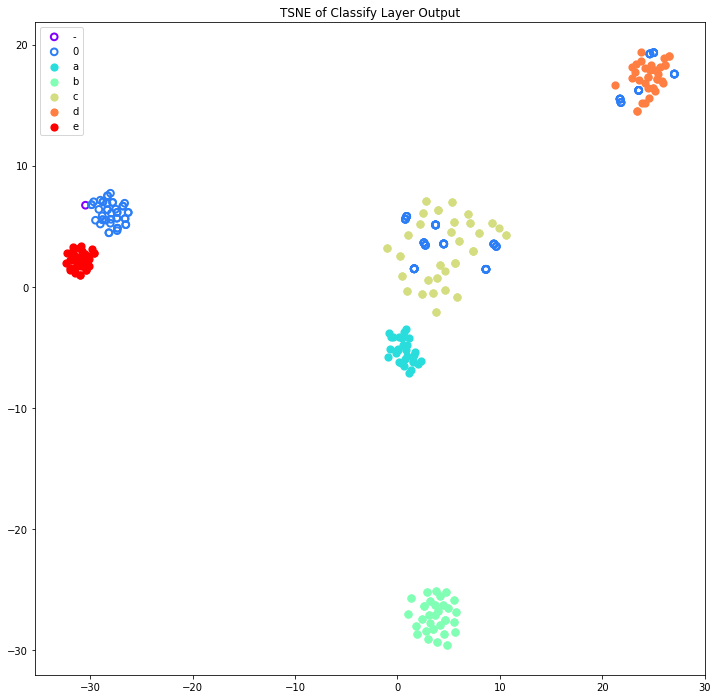

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()

for i in range(0,max(targets+1)):
    label_index = (targets == i)
    if i not in unlabelled_specs_index:
      ax.scatter(Y[label_index, 0], Y[label_index, 1], color=colors[i], s=45, linewidth=1.5)
    else:
      ax.scatter(Y[label_index, 0], Y[label_index, 1], color=colors[i], s=45, linewidth=2, facecolors='None')

plt.legend(list(le.classes_), loc='best')
plt.title('TSNE of Classify Layer Output')
plt.show()

In [ ]:
import umap
# pip install umap-learn
# import umap.plot
embedding = umap.UMAP(n_neighbors = 100, min_dist=0.2,  densmap=True).fit_transform(densenet121_features)
# mapper = umap.UMAP().fit(digits.data)
# umap.plot.points(embedding, labels=list(le.classes_))

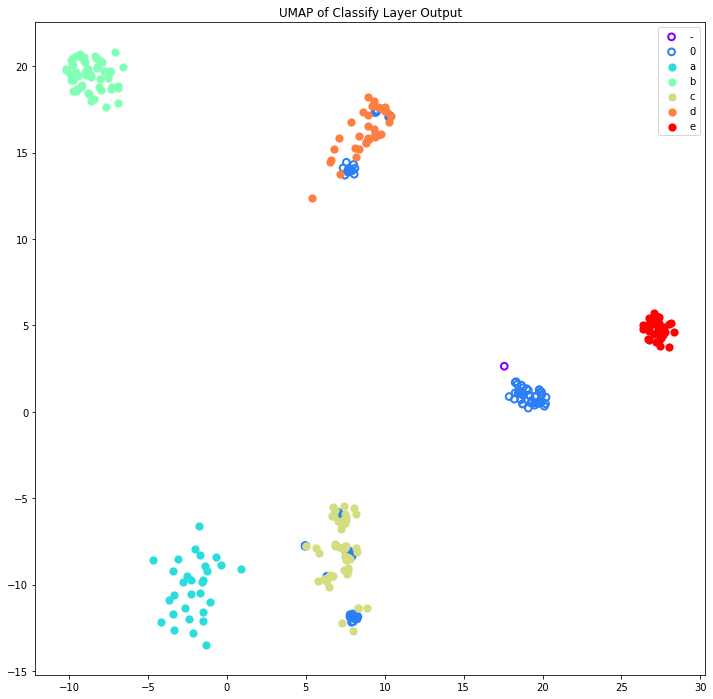

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot()

for i in range(0,max(targets+1)):
    label_index = (targets == i)
    if i not in unlabelled_specs_index:
      ax.scatter(embedding[label_index, 0], embedding[label_index, 1], color=colors[i], s=45, linewidth=1.5)
    else:
      ax.scatter(embedding[label_index, 0], embedding[label_index, 1], color=colors[i], s=45, linewidth=2, facecolors='None')

plt.legend(list(le.classes_), loc='best')
plt.title('UMAP of Classify Layer Output')
plt.show()

In [ ]:
Indv_syllable_spec = Single_dataset[Single_dataset['labels']=='z']

In [ ]:
Indv_syllable_spec.empty

True

In [ ]:
Indv_syllable_spec_selected = Indv_syllable_spec.values[np.random.randint(0,Indv_syllable_spec.shape[0],5)]

In [ ]:
def sample_individual_spectrogram_plot(Single_dataset, selected_label, num_sample=5):  
  Indv_syllable_spec = Single_dataset[Single_dataset['labels_indv']==selected_label].spectrogram
  if Indv_syllable_spec.empty == False:  ## Check if pandas dataframe is empty
    Indv_syllable_spec_selected = Indv_syllable_spec.values[np.random.randint(0,Indv_syllable_spec.shape[0],num_sample)]
    fig = plt.figure(figsize=(30, 6))
    for i in range(0,num_sample):
      ax = fig.add_subplot(1, num_sample, i+1)  
      ax.matshow(Indv_syllable_spec_selected[i], origin="lower")
    fig.suptitle('Spectrograms for label '+ selected_label)
  else:
    print('Selected label not found')

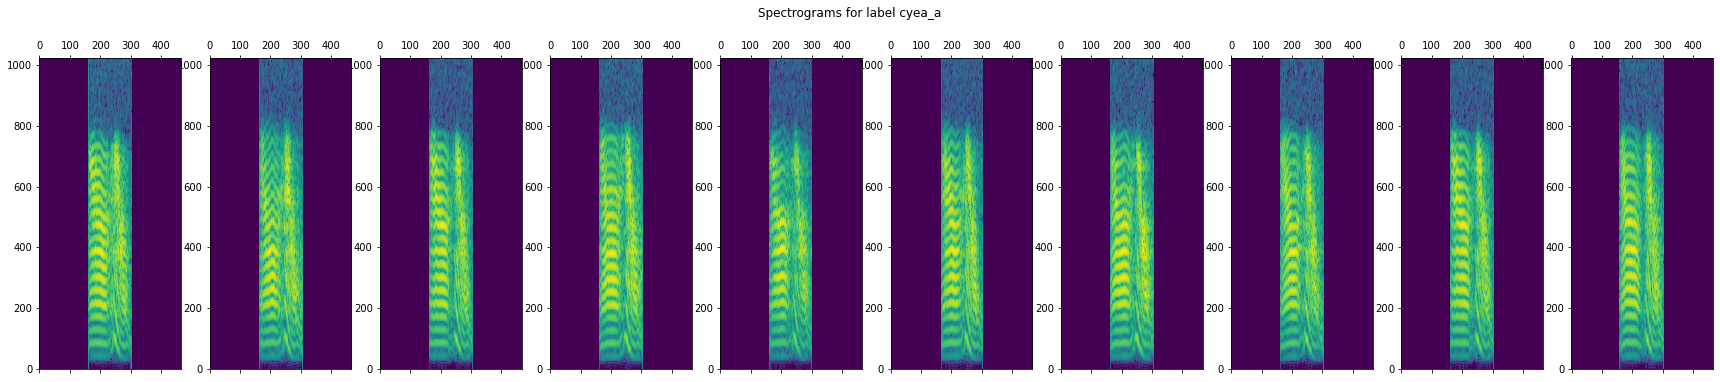

In [ ]:
sample_individual_spectrogram_plot(Single_dataset, 'cyea_a', num_sample=10)

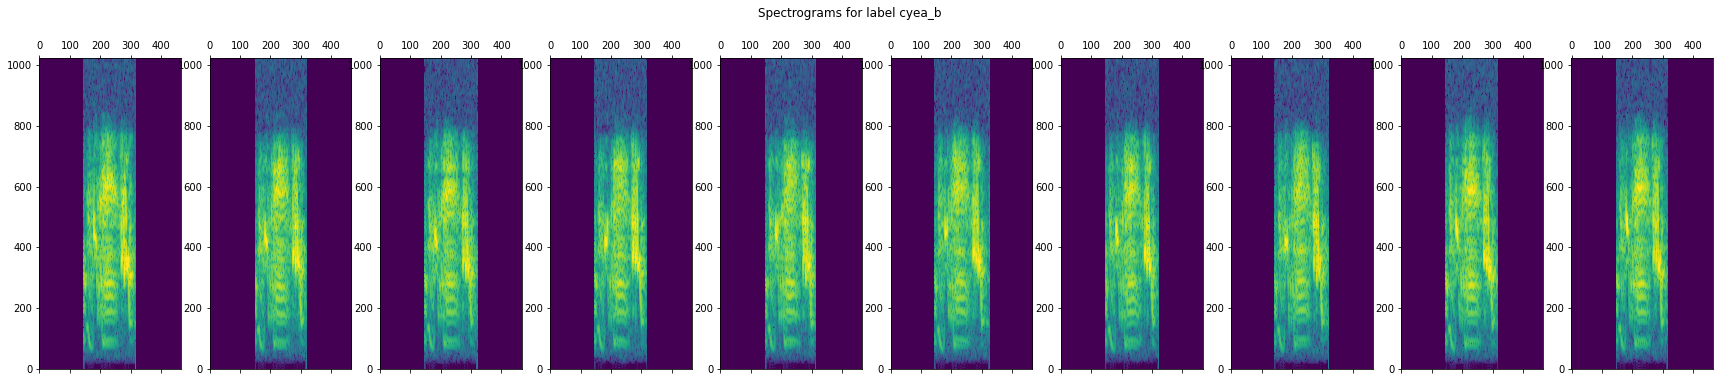

In [ ]:
sample_individual_spectrogram_plot(Single_dataset, 'cyea_b', num_sample=10)

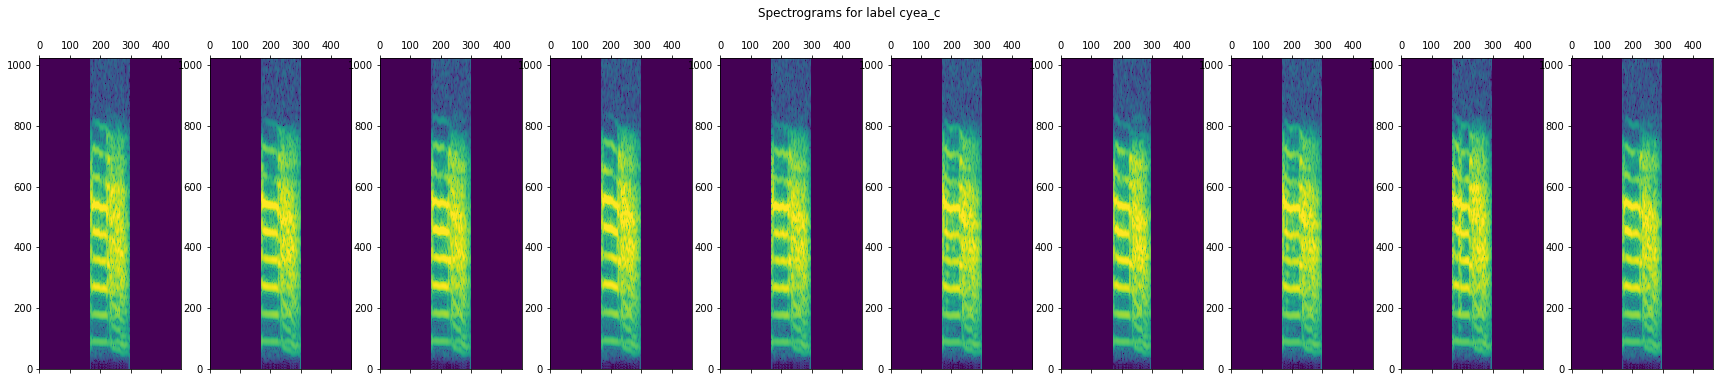

In [ ]:
sample_individual_spectrogram_plot(Single_dataset, 'cyea_c', num_sample=10)

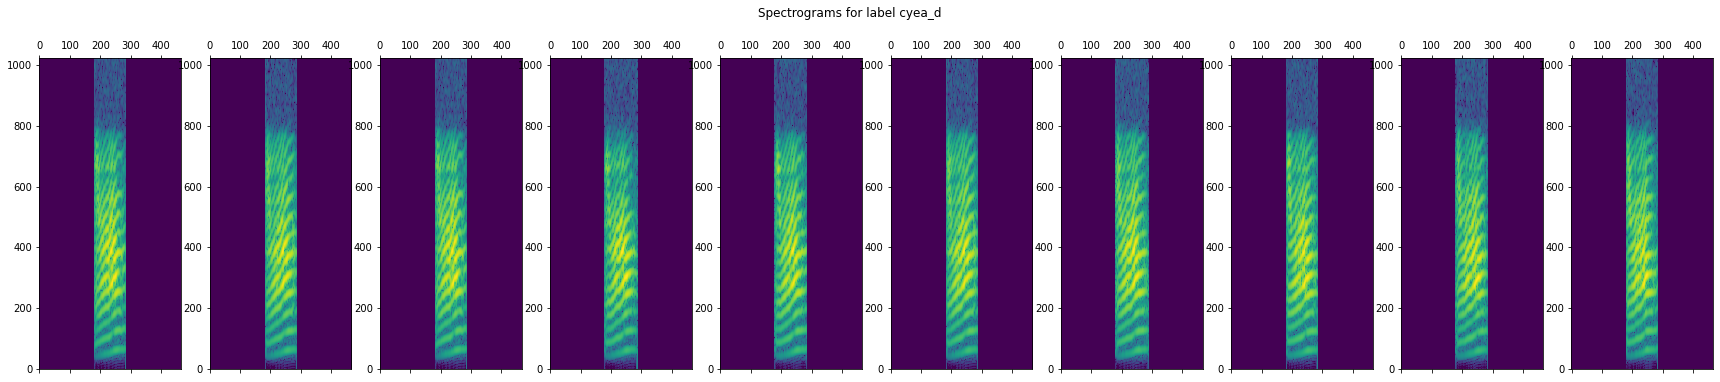

In [ ]:
sample_individual_spectrogram_plot(Single_dataset, 'cyea_d', num_sample=10)

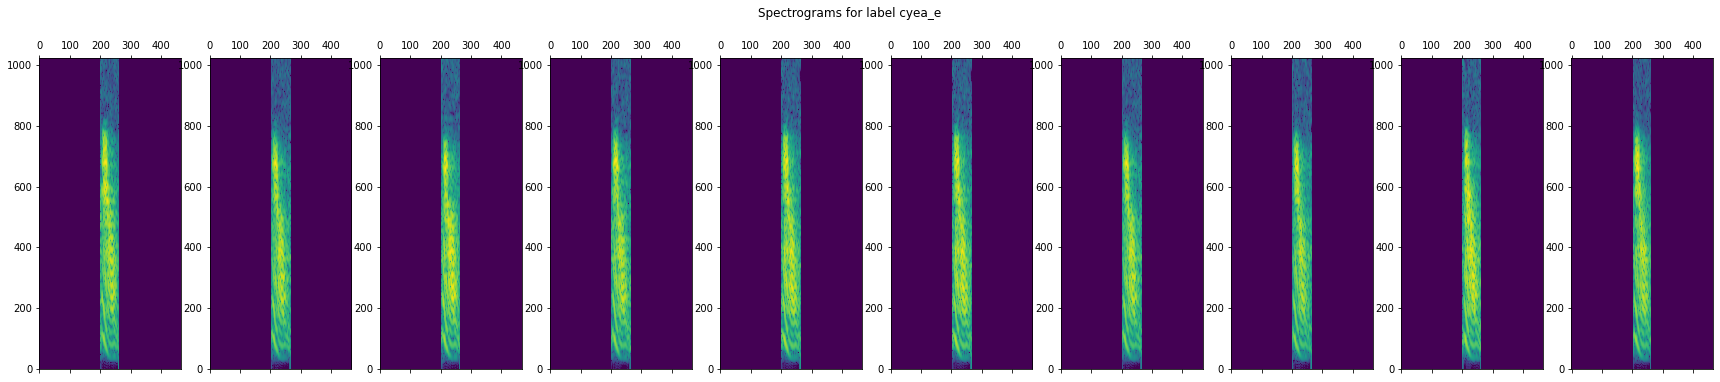

In [ ]:
sample_individual_spectrogram_plot(Single_dataset, 'cyea_e', num_sample=10)

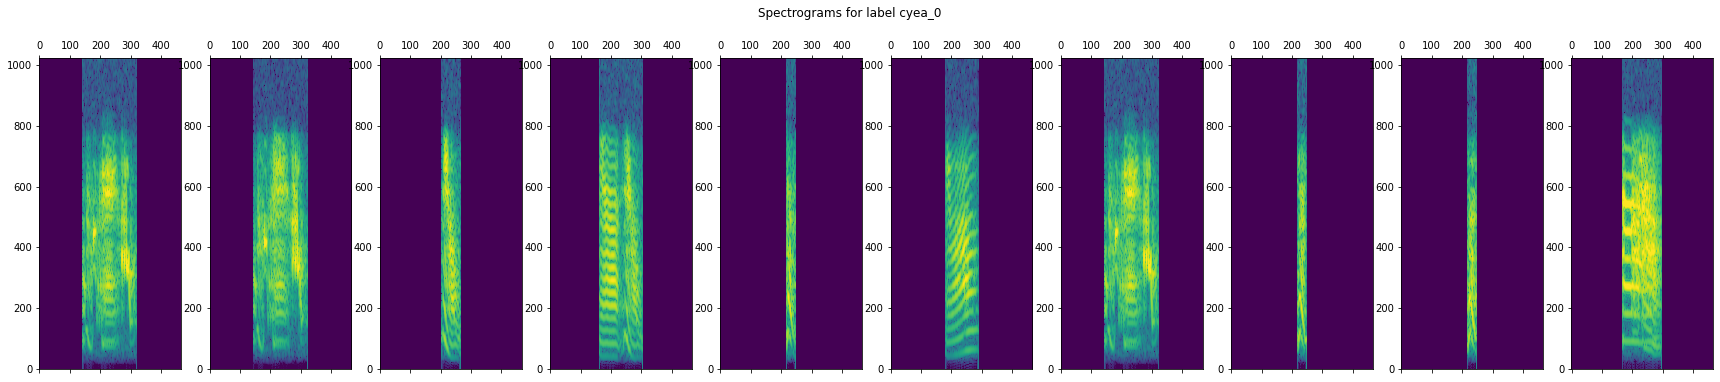

In [ ]:
sample_individual_spectrogram_plot(Single_dataset, 'cyea_0', num_sample=10)

# For a tutor and pupil overlap syllable plot

In [ ]:
Single_dataset.labels_indv.unique()

array(['cyea_-', 'cyea_a', 'cyea_b', 'cyea_c', 'cyea_d', 'cyea_e',
       'cyea_0', 'ivoj_-', 'ivoj_c', 'ivoj_d', 'ivoj_e', 'ivoj_a',
       'ivoj_b', 'ivoj_0', 'ivoj_A', 'ivoj_v'], dtype=object)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(Single_dataset.labels_indv.values)
targets = le.transform(Single_dataset.labels_indv.values)

In [ ]:
Single_dataset.labels_indv.values[8]

'cyea_0'

In [ ]:
targets[8]

1

In [ ]:
list(le.classes_)

['cyea_-',
 'cyea_0',
 'cyea_a',
 'cyea_b',
 'cyea_c',
 'cyea_d',
 'cyea_e',
 'ivoj_-',
 'ivoj_0',
 'ivoj_A',
 'ivoj_a',
 'ivoj_b',
 'ivoj_c',
 'ivoj_d',
 'ivoj_e',
 'ivoj_v']

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, max(targets)+1)) 
print(colors)

[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [3.66666667e-01 2.07911691e-01 9.94521895e-01 1.00000000e+00]
 [2.33333333e-01 4.06736643e-01 9.78147601e-01 1.00000000e+00]
 [1.00000000e-01 5.87785252e-01 9.51056516e-01 1.00000000e+00]
 [3.33333333e-02 7.43144825e-01 9.13545458e-01 1.00000000e+00]
 [1.66666667e-01 8.66025404e-01 8.66025404e-01 1.00000000e+00]
 [3.00000000e-01 9.51056516e-01 8.09016994e-01 1.00000000e+00]
 [4.33333333e-01 9.94521895e-01 7.43144825e-01 1.00000000e+00]
 [5.66666667e-01 9.94521895e-01 6.69130606e-01 1.00000000e+00]
 [7.00000000e-01 9.51056516e-01 5.87785252e-01 1.00000000e+00]
 [8.33333333e-01 8.66025404e-01 5.00000000e-01 1.00000000e+00]
 [9.66666667e-01 7.43144825e-01 4.06736643e-01 1.00000000e+00]
 [1.00000000e+00 5.87785252e-01 3.09016994e-01 1.00000000e+00]
 [1.00000000e+00 4.06736643e-01 2.07911691e-01 1.00000000e+00]
 [1.00000000e+00 2.07911691e-01 1.04528463e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.000000

In [ ]:
unlabelled_specs = ['cyea_-','cyea_0','ivoj_-','ivoj_0']
unlabelled_specs_index = []
for unlabel in unlabelled_specs:
  unlabelled_specs_index.append(list(le.classes_).index(unlabel))
print(unlabelled_specs_index)

[0, 1, 7, 8]


In [ ]:
import umap
# pip install umap-learn
# import umap.plot
embedding = umap.UMAP(n_neighbors = 100, min_dist=0.1,  densmap=True).fit_transform(densenet121_features)

In [ ]:
label_index = (targets == i)

In [ ]:
labels_list = list(le.classes_)
labels_list

['cyea_-',
 'cyea_0',
 'cyea_a',
 'cyea_b',
 'cyea_c',
 'cyea_d',
 'cyea_e',
 'ivoj_-',
 'ivoj_0',
 'ivoj_A',
 'ivoj_a',
 'ivoj_b',
 'ivoj_c',
 'ivoj_d',
 'ivoj_e',
 'ivoj_v']

In [ ]:
for i in range(0,max(targets+1)):
    label_index = (targets == i)
    if 'cyea' in labels_list[i]:
      print(i, labels_list[i])
    else:
      print(labels_list[i], i)

0 cyea_-
1 cyea_0
2 cyea_a
3 cyea_b
4 cyea_c
5 cyea_d
6 cyea_e
ivoj_- 7
ivoj_0 8
ivoj_A 9
ivoj_a 10
ivoj_b 11
ivoj_c 12
ivoj_d 13
ivoj_e 14
ivoj_v 15


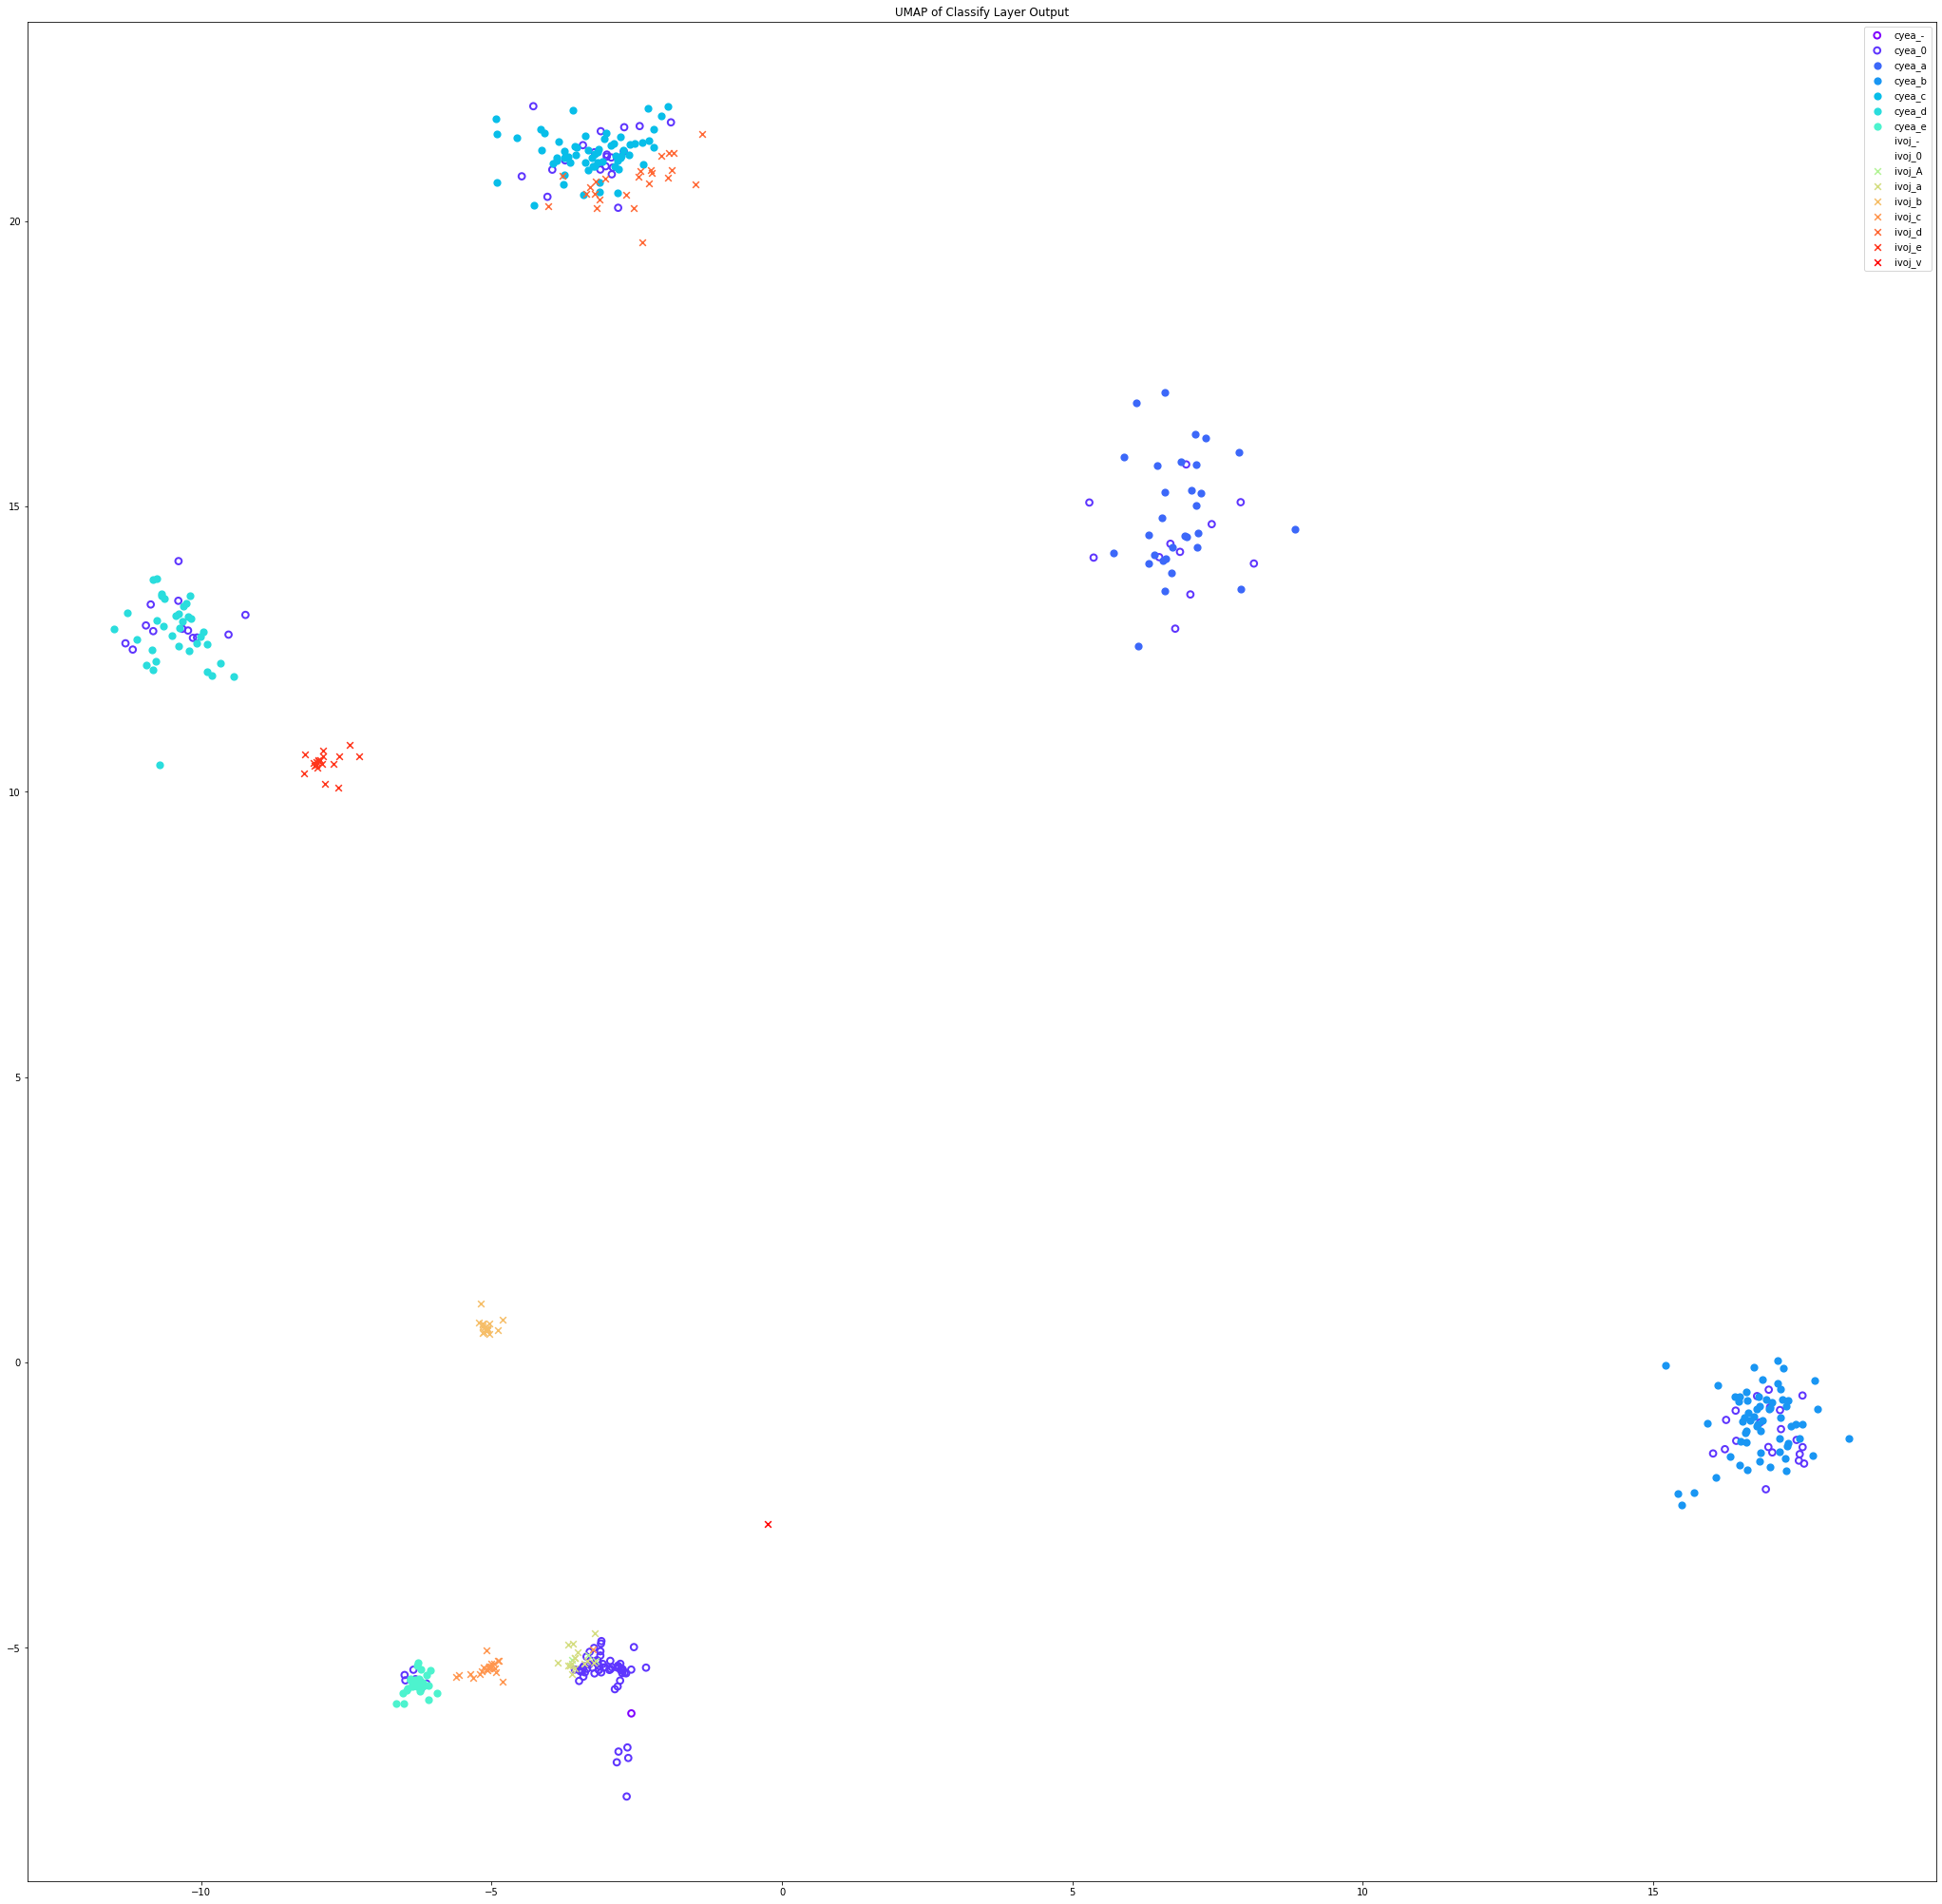

In [ ]:
fig = plt.figure(figsize=(36, 36))
ax = fig.add_subplot()

for i in range(0,max(targets+1)):
    label_index = (targets == i)
    if 'cyea' in labels_list[i]:
      marker = "o"
    else:
      marker = "x"
    if i not in unlabelled_specs_index:
      ax.scatter(embedding[label_index, 0], embedding[label_index, 1], color=colors[i], s=45, marker = marker, linewidth=1.5)
    else:
      ax.scatter(embedding[label_index, 0], embedding[label_index, 1], color=colors[i], s=45, marker = marker, linewidth=2, facecolors='None')

plt.legend(list(le.classes_), loc='best')
plt.title('UMAP of Classify Layer Output')
plt.show()

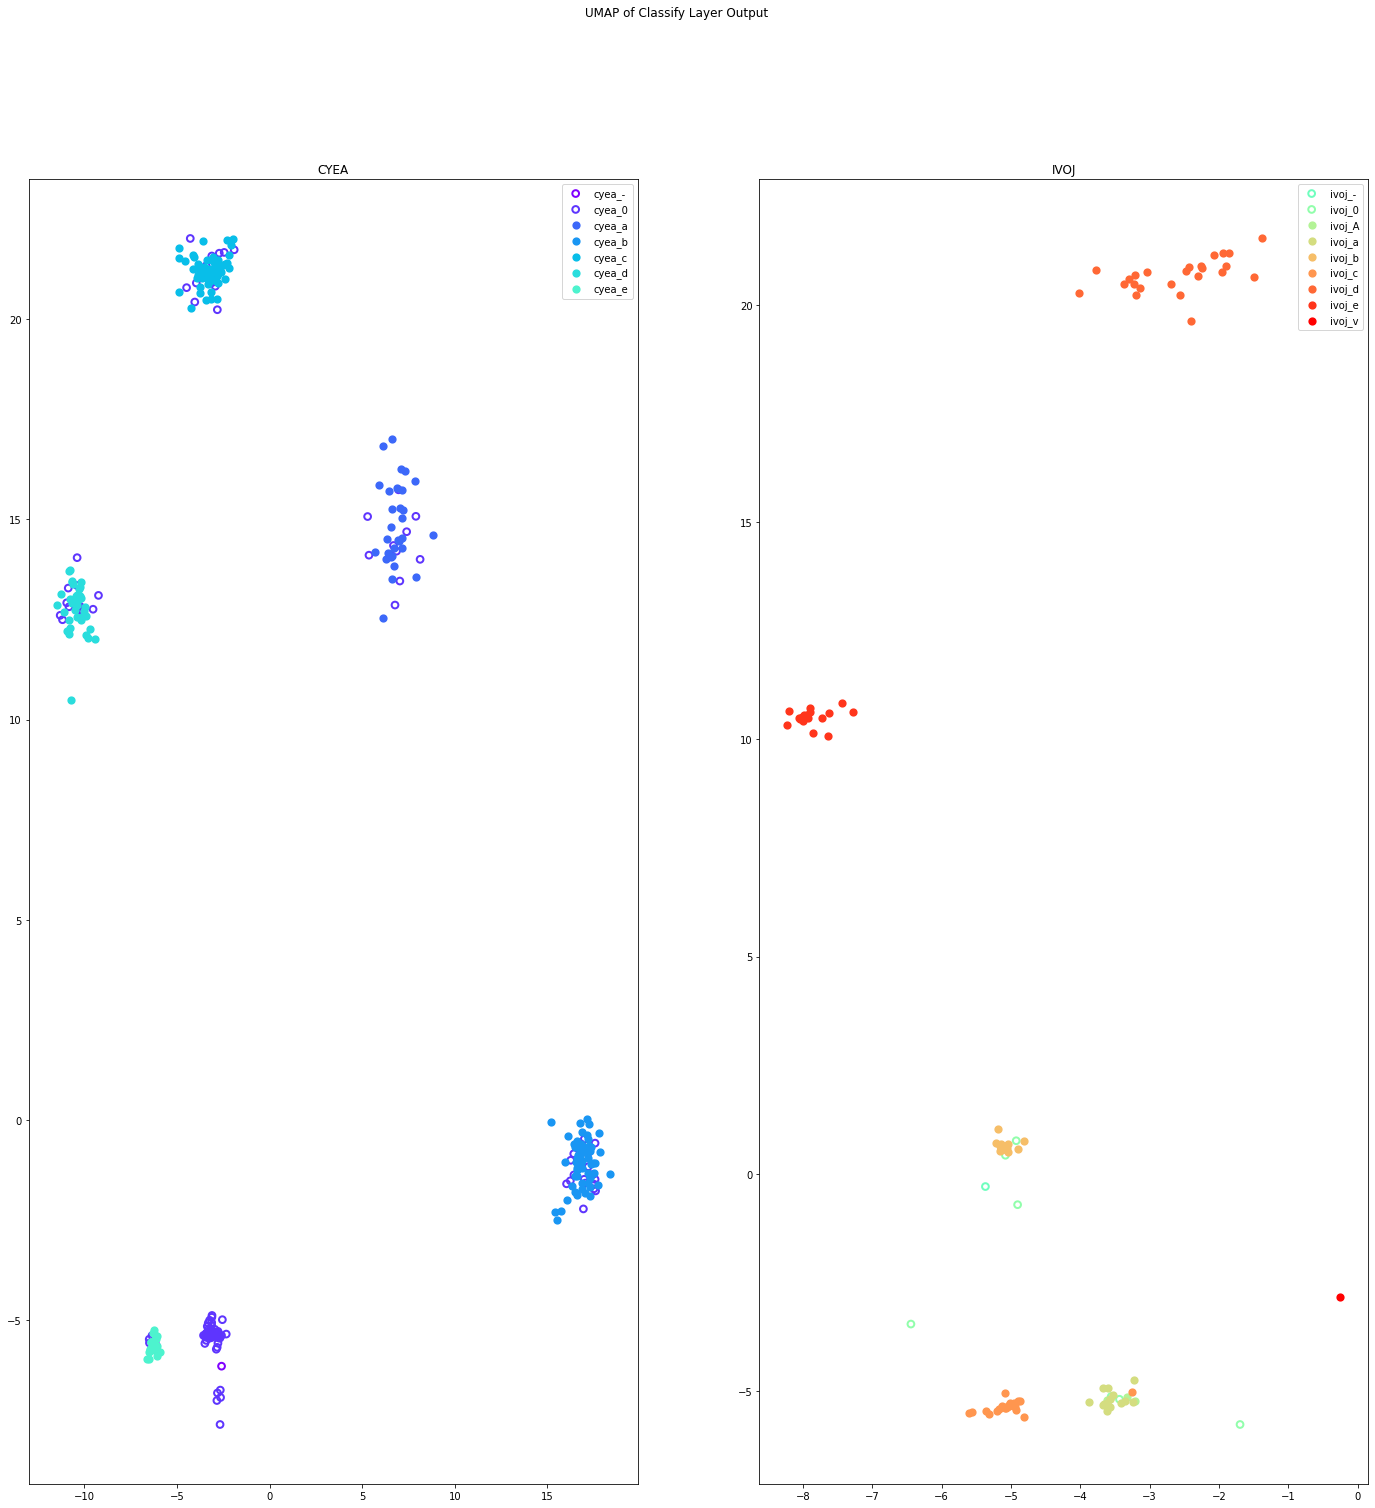

In [ ]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(24, 24))
legend1 = []; legend2 = [];
for i in range(0,max(targets+1)):
    label_index = (targets == i)
    marker = "o"
    if 'cyea' in labels_list[i]:
      legend1.append(labels_list[i])
      # marker = "o"
      ax = axs[0]
      if i not in unlabelled_specs_index:
        ax.scatter(embedding[label_index, 0], embedding[label_index, 1], color=colors[i], s=45, marker = marker, linewidth=1.5)
      else:
        ax.scatter(embedding[label_index, 0], embedding[label_index, 1], color=colors[i], s=45, marker = marker, linewidth=2, facecolors='None')
    else:
      legend2.append(labels_list[i])
      # marker = "x"
      ax = axs[1]
      if i not in unlabelled_specs_index:
        ax.scatter(embedding[label_index, 0], embedding[label_index, 1], color=colors[i], s=45, marker = marker, linewidth=1.5)
      else:
        ax.scatter(embedding[label_index, 0], embedding[label_index, 1], color=colors[i], s=45, marker = marker, linewidth=2, facecolors='None')
axs[0].title.set_text('CYEA')
axs[0].legend(legend1, loc='best')
axs[1].title.set_text('IVOJ')
axs[1].legend(legend2, loc='best')
# plt.legend(list(le.classes_), loc='best')
fig.suptitle('UMAP of Classify Layer Output')
plt.show()

In [ ]:
# fig, axs = plt.subplots(nrows=1,ncols=2, sharex=True, sharey=True, figsize=(24, 24))

# for i in range(0,max(targets+1)):
#     label_index = (targets == i)
#     marker = "o"
#     if 'cyea_d' in labels_list[i]:
#      axs[0].scatter(embedding[label_index, 0], embedding[label_index, 1], color=colors[i], s=45, marker = marker, linewidth=1.5)
#     elif 'ivoj_e' in labels_list[i]:
#       axs[0].scatter(embedding[label_index, 0], embedding[label_index, 1], color=colors[i], s=45, marker ='x', linewidth=1.5)
#     if 'cyea_c' in labels_list[i]:
#      axs[1].scatter(embedding[label_index, 0], embedding[label_index, 1], color=colors[i], s=45, marker = marker, linewidth=1.5)
#     elif 'ivoj_d' in labels_list[i]:
#       axs[1].scatter(embedding[label_index, 0], embedding[label_index, 1], color=colors[i], s=45, marker ='x', linewidth=1.5)
#       # # marker = "x"
#       # ax = axs[1]
#       # if i not in unlabelled_specs_index:
#       #   ax.scatter(embedding[label_index, 0], embedding[label_index, 1], color=colors[i], s=45, marker = marker, linewidth=1.5)
#       # else:
#       #   ax.scatter(embedding[label_index, 0], embedding[label_index, 1], color=colors[i], s=45, marker = marker, linewidth=2, facecolors='None')
# # axs[0].title.set_text('CYEA')
# # axs[0].legend(legend1, loc='best')
# # axs[1].title.set_text('IVOJ')
# # axs[1].legend(legend2, loc='best')
# # plt.legend(list(le.classes_), loc='best')
# fig.suptitle('UMAP of Classify Layer Output')
# plt.show()

In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20

In [ ]:
output_notebook()

In [ ]:
Single_dataset['umap0'] = embedding[:,0]
Single_dataset['umap1'] = embedding[:,1]

In [ ]:
index_cmap = factor_cmap('labels_indv', palette=Category20[14], 
                         factors=sorted(Single_dataset.labels_indv.unique()))

/usr/local/lib/python3.7/dist-packages/bokeh/models/mappers.py:147: UserWarning: Palette length does not match number of factors. ['ivoj_e', 'ivoj_v'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [ ]:
Single_dataset.labels_indv.unique()

array(['cyea_-', 'cyea_a', 'cyea_b', 'cyea_c', 'cyea_d', 'cyea_e',
       'cyea_0', 'ivoj_-', 'ivoj_c', 'ivoj_d', 'ivoj_e', 'ivoj_a',
       'ivoj_b', 'ivoj_0', 'ivoj_A', 'ivoj_v'], dtype=object)

In [ ]:
p = figure(plot_width=600, plot_height=450, title = "Decathlon: Discus x Javeline",toolbar_location=None,
          tools="hover", tooltips="@labels_indv: (@key ,@indvi)")
p.scatter('umap0','umap1',source=Single_dataset_tryout,fill_alpha=0.6, fill_color=index_cmap,size=10,legend_label='labels_indv')
# p.xaxis.axis_label = 'Discus'
# p.yaxis.axis_label = 'Javeline'
# p.legend.location = "top_left"
show(p)

In [ ]:
pip install umap-learn[plot]

     |████████████████████████████████| 1.6MB 11.8MB/s 
     |████████████████████████████████| 15.8MB 46.5MB/s 
     |████████████████████████████████| 81kB 5.8MB/s 
     |████████████████████████████████| 112kB 64.6MB/s 
     |████████████████████████████████| 686kB 45.1MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-cp37-none-any.whl size=59430 sha256=c14a70c363adb7760a7a8a3a4ad14e6e6ee6a2c4adc0bc1a291c0cf9cfbdad25
  Stored in directory: /root/.cache/pip/wheels/8d/06/05/c1cba3d57bdcfd3960e3f60a9fdc97e4baef2ef09af0ad1ef8
Successfully built datashape
ERROR: distributed 2021.3.1 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
ERROR: distributed 2021.3.1 has requirement dask>=2021.03.0, but you'll have dask 2.12.0 which is incompatible.
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3


In [ ]:
import umap.plot
# https://github.com/lmcinnes/umap/blob/master/umap/plot.py

In [ ]:
embedding2 = umap.UMAP(n_neighbors = 500, min_dist=0.1,  densmap=True).fit(densenet121_features)

In [ ]:
## SAVING AND LOADING UMAP MODELS

# with pickle
import pickle

f_name = 'Nest1_embedding.sav'
pickle.dump(embedding2, open(f_name, 'wb'))

# time passes
# loaded_model = pickle.load((open(f_name, 'rb')))
# print(type(loaded_model))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


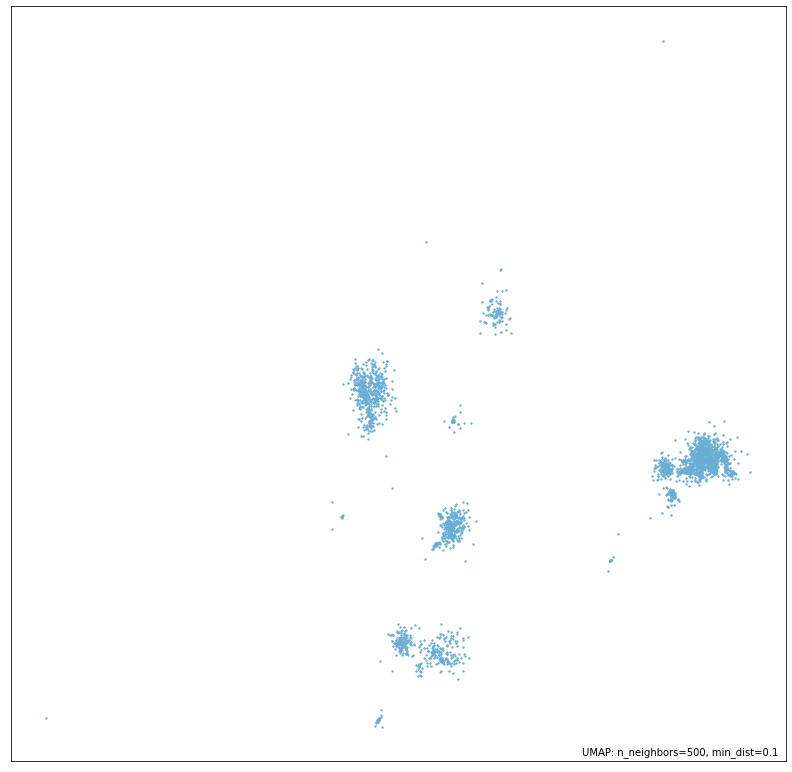

In [ ]:
umap.plot.points(embedding2, width=1000, height=1000)

In [ ]:
hover_data = Single_dataset[["labels_indv", "key", "indvi", "indv"]]

In [ ]:
hover_data

labels_indv        key  indvi  indv
0         cyea_-  cyea_0000      1  cyea
1         cyea_a  cyea_0000      2  cyea
2         cyea_b  cyea_0000      3  cyea
3         cyea_c  cyea_0000      4  cyea
4         cyea_d  cyea_0000      5  cyea
...          ...        ...    ...   ...
2934      phpd_0  phpd_0062      1  phpd
2935      phpd_0  phpd_0062      2  phpd
2936      phpd_0  phpd_0062      3  phpd
2937      phpd_0  phpd_0062      4  phpd
2938      phpd_0  phpd_0062      5  phpd

[2939 rows x 4 columns]

In [ ]:
umap.plot.output_notebook()

In [ ]:
# p = umap.plot.interactive(embedding2, labels=Single_dataset.labels_indv.values, hover_data=hover_data, point_size=2)
p = umap.plot.interactive(embedding2, labels=Single_dataset.indv.values, hover_data=hover_data, point_size=4)
umap.plot.show(p)

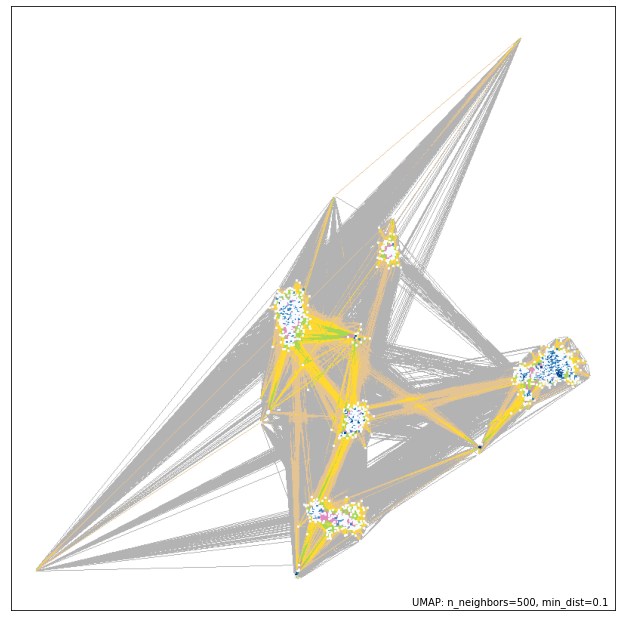

In [ ]:
umap.plot.connectivity(embedding2, show_points=True, edge_cmap='Set2_r')

/usr/local/lib/python3.7/dist-packages/umap/plot.py:855: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"


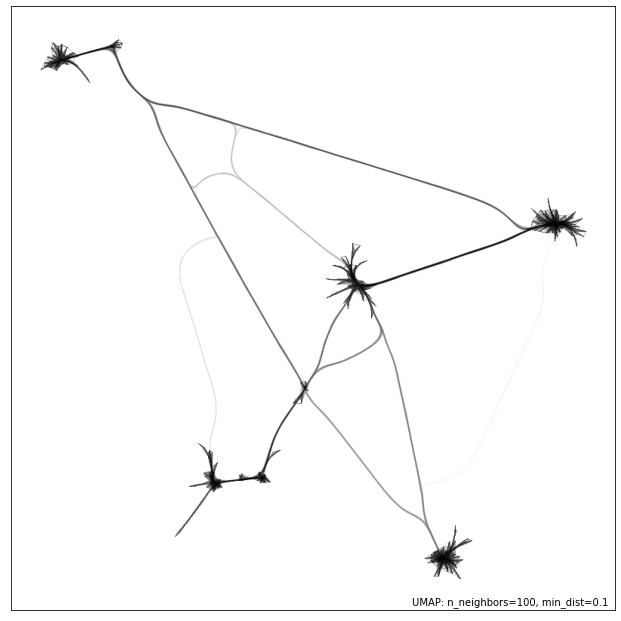

In [ ]:
umap.plot.connectivity(embedding2, edge_bundling='hammer')

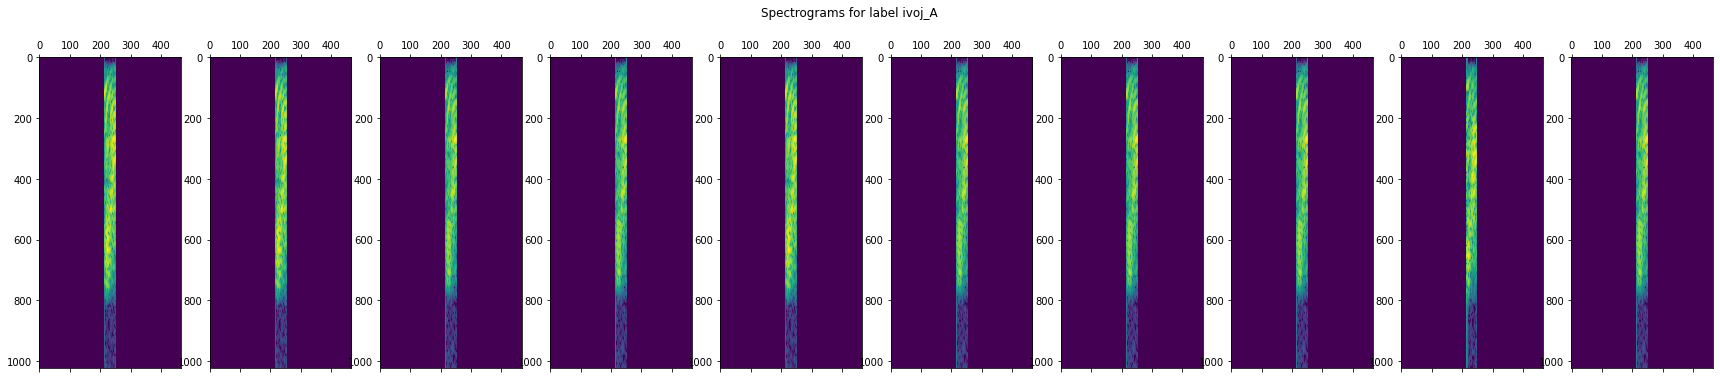

In [ ]:
"sample_individual_spectrogram_plot(Single_dataset, 'ivoj_A', num_sample=10)

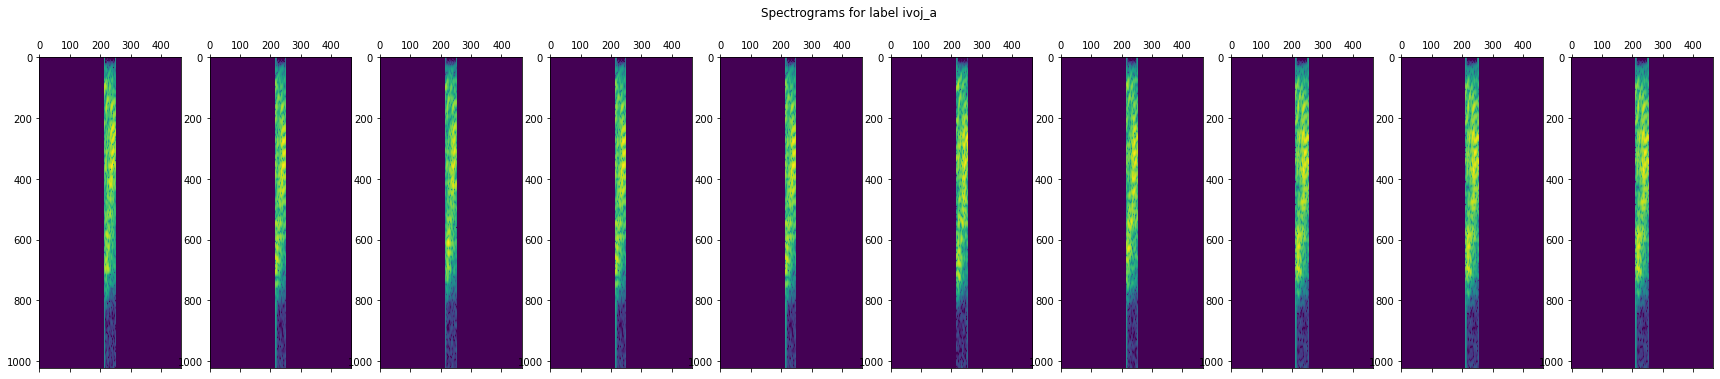

In [ ]:
sample_individual_spectrogram_plot(Single_dataset, 'ivoj_a', num_sample=10)

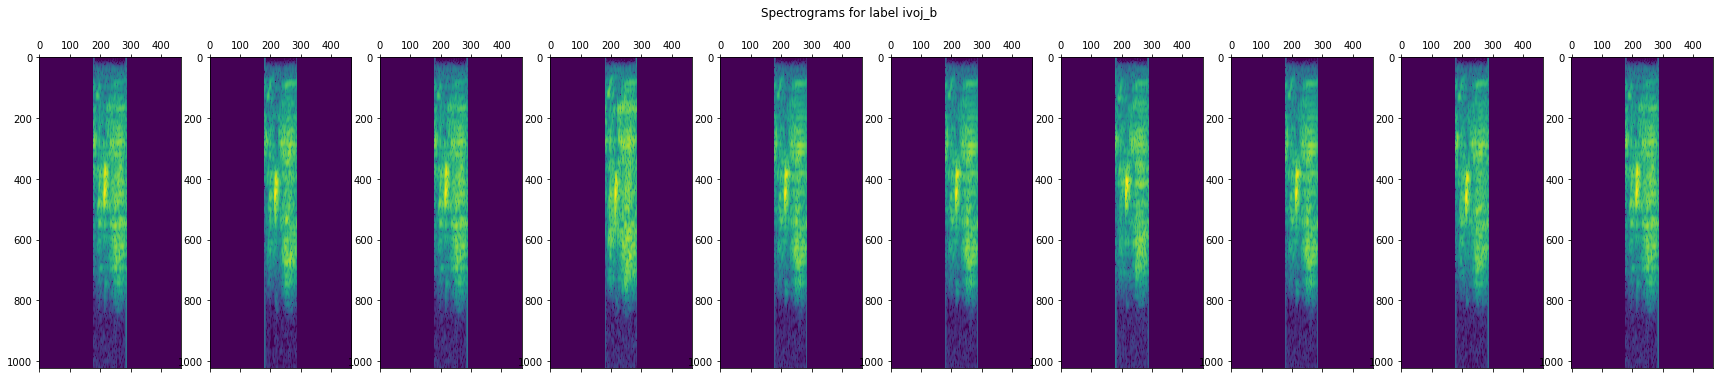

In [ ]:
sample_individual_spectrogram_plot(Single_dataset, 'ivoj_b', num_sample=10)

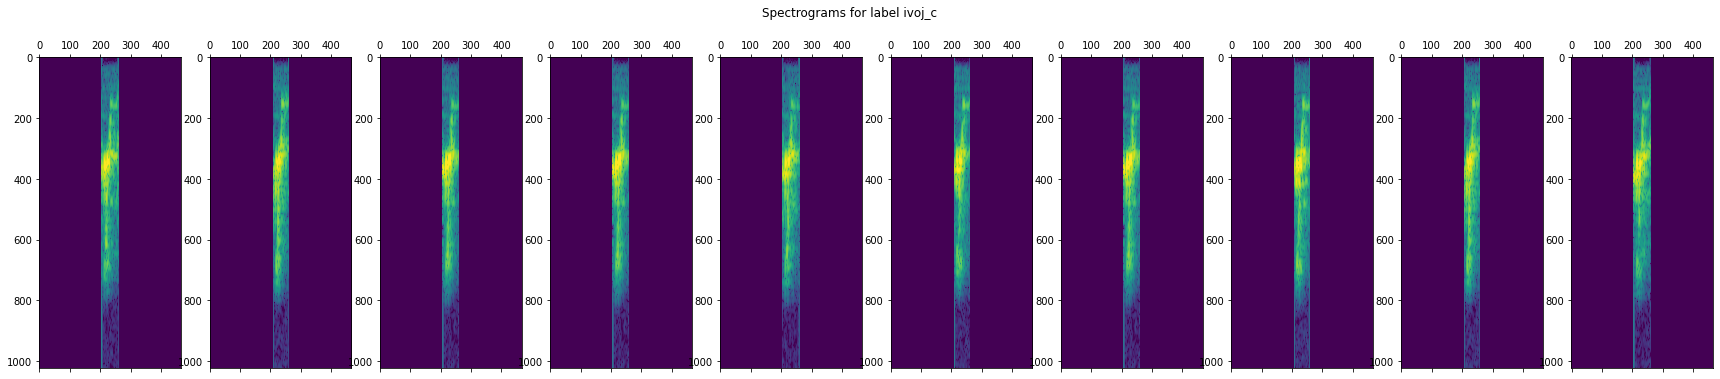

In [ ]:
sample_individual_spectrogram_plot(Single_dataset, 'ivoj_c', num_sample=10)

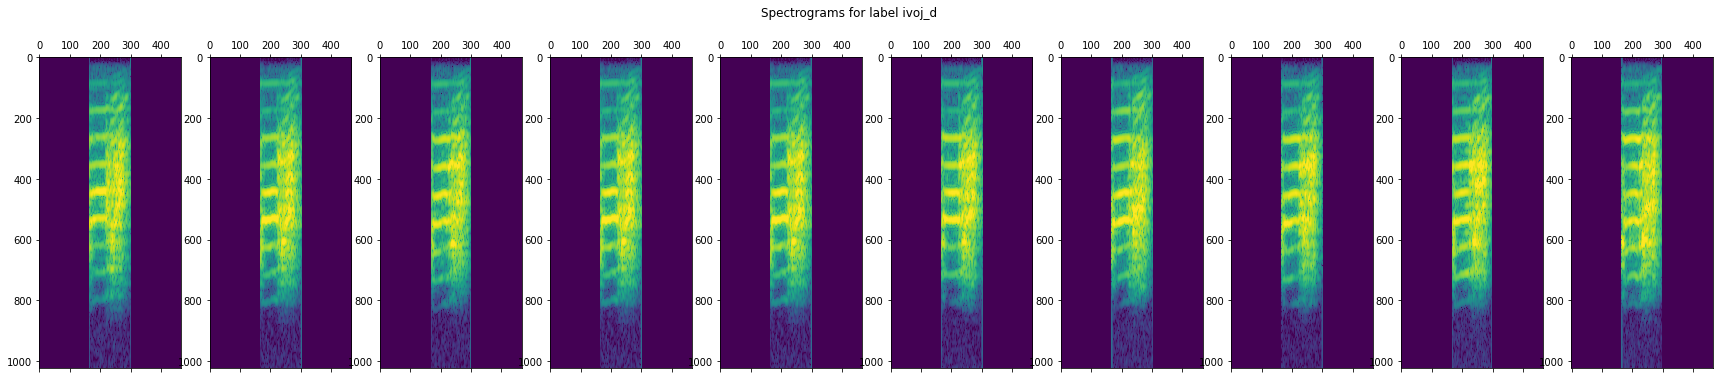

In [ ]:
sample_individual_spectrogram_plot(Single_dataset, 'ivoj_d', num_sample=10)

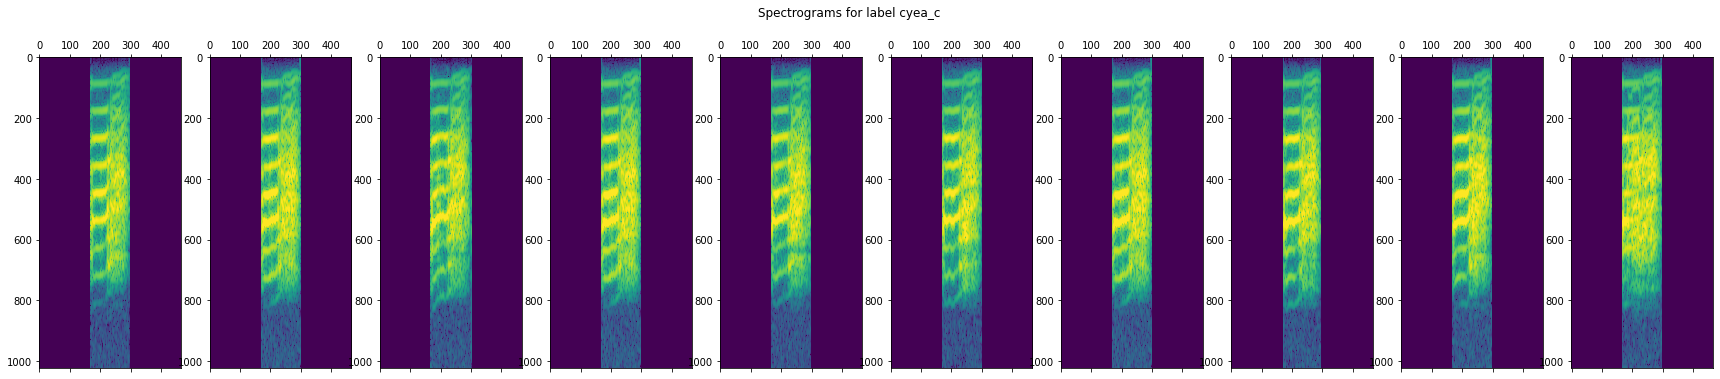

In [ ]:
sample_individual_spectrogram_plot(Single_dataset, 'cyea_c', num_sample=10)

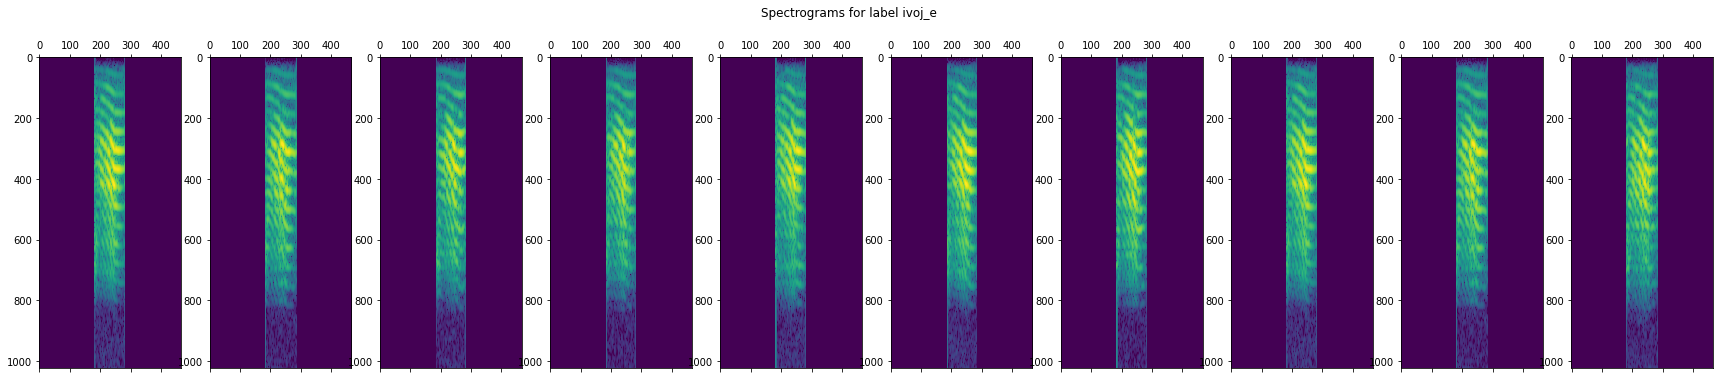

In [ ]:
sample_individual_spectrogram_plot(Single_dataset, 'ivoj_e', num_sample=10)

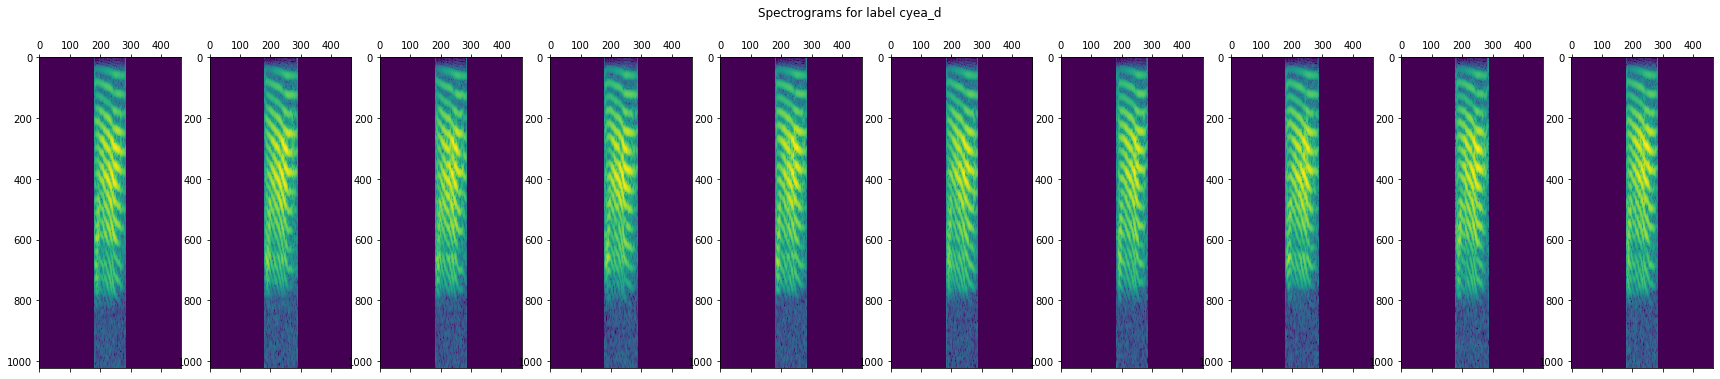

In [ ]:
sample_individual_spectrogram_plot(Single_dataset, 'cyea_d', num_sample=10)

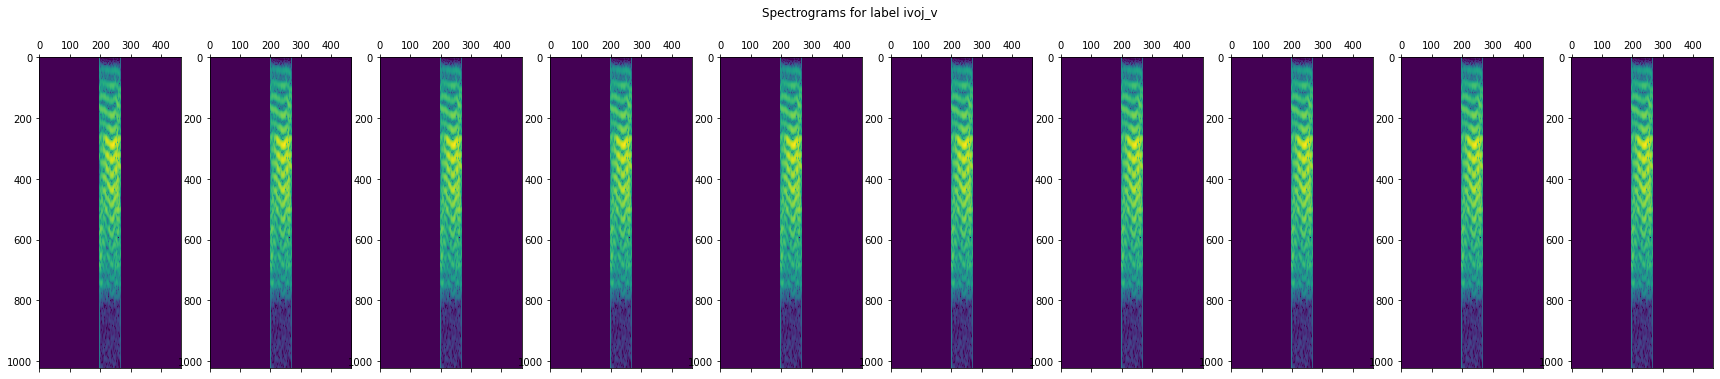

In [ ]:
sample_individual_spectrogram_plot(Single_dataset, 'ivoj_v', num_sample=10)